In [ ]:
!pip install matplotlib fpdf
!pip install deepface scipy numpy opencv-python

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=4924c5c7c5845ded298a775f64d67b744922b94e21a6189b3a8e85e6a2502683
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=57064a6ccbc8ed4de9774bf58a9f7163969537ba2e7f2e24138dc7bb35d2405d
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b60

In [ ]:
# Install Git LFS (required for large file downloads)
!git lfs install

# Clone the dataset repository from Hugging Face
!git clone https://huggingface.co/datasets/cledoux42/autotrain-data-ethnicity-test_v003

# Import required libraries
import shutil
from google.colab import files

# Define source directory and output ZIP file path
source_dir = "/content/autotrain-data-ethnicity-test_v003/raw/image_folders/auto/ethnicty-classify"
zip_file = "/content/ethnicity_dataset.zip"

# Zip the entire ethnicity-classify folder
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', source_dir)

# Download the ZIP file
files.download(zip_file)

# !unzip ethnicity_dataset.zip -d dataset

Git LFS initialized.
Cloning into 'autotrain-data-ethnicity-test_v003'...
remote: Enumerating objects: 6085, done.
remote: Total 6085 (delta 0), reused 0 (delta 0), pack-reused 6085 (from 1)
Receiving objects: 100% (6085/6085), 829.33 KiB | 3.29 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Updating files: 100% (5677/5677), done.
Filtering content: 100% (5670/5670), 2.06 GiB | 18.40 MiB/s, done.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip ethnicity_dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/indian/00766.jpg  
  inflating: dataset/indian/00528.jpg  
  inflating: dataset/indian/00471.jpg  
  inflating: dataset/indian/00731.jpg  
  inflating: dataset/indian/00374.jpg  
  inflating: dataset/indian/00251.jpg  
  inflating: dataset/indian/00670.jpg  
  inflating: dataset/indian/00179.jpg  
  inflating: dataset/indian/00595.jpg  
  inflating: dataset/indian/00034.jpg  
  inflating: dataset/indian/00563.jpg  
  inflating: dataset/indian/00777.jpg  
  inflating: dataset/indian/00115.jpg  
  inflating: dataset/indian/00147.jpg  
  inflating: dataset/indian/00589.jpg  
  inflating: dataset/indian/00774.jpg  
  inflating: dataset/indian/00303.jpg  
  inflating: dataset/indian/00970.jpg  
  inflating: dataset/indian/01100.jpg  
  inflating: dataset/indian/00383.jpg  
  inflating: dataset/indian/00661.jpg  
  inflating: dataset/indian/00011.jpg  
  inflating: dataset/indian/00436.jpg  
  inflating: dataset/indian/0

25-04-26 05:11:01 - Directory /root/.deepface has been created
25-04-26 05:11:01 - Directory /root/.deepface/weights has been created
25-04-26 05:11:04 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:09<00:00, 58.1MB/s]


[SKIP] predicted 'middle eastern' for dataset/african/00073.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00075.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/01111.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00232.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00212.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/01022.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00057.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00177.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00124.jpg not in label set → counted as FN
[SKIP] predicted 'middle eastern' for dataset/african/00739.jpg not in label set → counted as FN
[SKIP] predicted 'middle easte

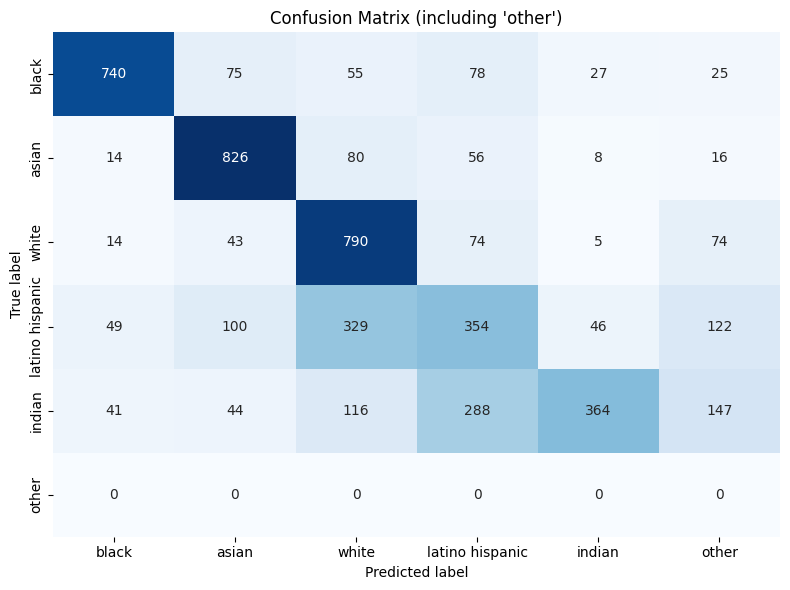

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from sklearn.metrics import confusion_matrix
import seaborn as sns

# --- Configuration ---
DATASET_PATH = "dataset"  # subfolders: 'african', 'asian', etc.
IMG_SIZE = (160, 160)

# Map your folder names → DeepFace keys
ETHNICITY_MAP = {
    "african": "black",
    "asian": "asian",
    "caucasian": "white",
    "hispanic": "latino hispanic",
    "indian": "indian"
}
# The “valid” labels we want to evaluate
ETHNICITY_LABELS = ['black', 'asian', 'white', 'latino hispanic', 'indian']
# A catch‑all for any prediction outside our set or detection failures
OTHER_LABEL = 'other'
FULL_LABELS = ETHNICITY_LABELS + [OTHER_LABEL]

# --- Helpers ---
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    return cv2.resize(img, IMG_SIZE)

def predict_ethnicity(img):
    try:
        out = DeepFace.analyze(img_path=img, actions=['race'], enforce_detection=False)
        return out[0]['race']
    except Exception as e:
        print(f"[ERROR] DeepFace.analyze failed: {e}")
        return None

# --- Collect preds & ground truths, forcing every image into the tally ---
ethnicity_predictions = []
ground_truth = []

for folder in ETHNICITY_MAP:
    path = os.path.join(DATASET_PATH, folder)
    if not os.path.isdir(path):
        continue

    imgs = os.listdir(path)[:1000]
    for fn in imgs:
        img_path = os.path.join(path, fn)
        img = preprocess_image(img_path)
        if img is None:
            print(f"[SKIP] could not read file {img_path} → counted as FN")
            ethnicity_predictions.append(OTHER_LABEL)
            ground_truth.append(ETHNICITY_MAP[folder])
            continue

        preds = predict_ethnicity(img)
        if not preds:
            print(f"[SKIP] no DeepFace result for {img_path} → counted as FN")
            ethnicity_predictions.append(OTHER_LABEL)
            ground_truth.append(ETHNICITY_MAP[folder])
            continue

        top = max(preds, key=preds.get)
        if top not in ETHNICITY_LABELS:
            print(f"[SKIP] predicted '{top}' for {img_path} not in label set → counted as FN")
            ethnicity_predictions.append(OTHER_LABEL)
        else:
            ethnicity_predictions.append(top)
        ground_truth.append(ETHNICITY_MAP[folder])

# --- Build confusion matrix over FULL_LABELS so no image is dropped ---
cm = confusion_matrix(ground_truth, ethnicity_predictions, labels=FULL_LABELS)

# --- Metrics on our five target classes only ---
def calculate_metrics(cm, labels):
    total = cm.sum()
    m = {}
    for i, lbl in enumerate(labels):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total - (TP + FP + FN)

        FPR = FP / (FP + TN) if (FP + TN) else 0
        FNR = FN / (FN + TP) if (FN + TP) else 0
        TE  = FNR / FPR if FPR else float('inf')

        m[lbl] = dict(TP=TP, FP=FP, FN=FN, TN=TN, FPR=FPR, FNR=FNR, Treatment_Equality=TE)
    return m

metrics = calculate_metrics(cm, ETHNICITY_LABELS)

print("\n📊 Performance Metrics and Treatment Equality:\n")
for lbl, v in metrics.items():
    print(f"{lbl.capitalize():<16} TP={v['TP']:2d}  FP={v['FP']:2d}  FN={v['FN']:2d}  TN={v['TN']:2d}  "
          f"FPR={v['FPR']:.4f}  FNR={v['FNR']:.4f}  TE={v['Treatment_Equality']:.4f}")

# --- Plot confusion matrix including ‘other’ row/col ---
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=FULL_LABELS, yticklabels=FULL_LABELS,
            cmap='Blues', cbar=False)
plt.title("Confusion Matrix (including 'other')")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

In [ ]:
# --- Additional Fairness Metrics ---

def compute_fairness_metrics(cm, labels):
    metrics = {}
    total_samples = cm.sum()
    label_indices = {lbl: i for i, lbl in enumerate(labels)}

    for lbl in labels:
        i = label_indices[lbl]

        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total_samples - TP - FP - FN

        # Demographic Parity: P(pred = positive | group)
        pred_pos = cm[:, i].sum()
        dp = pred_pos / total_samples if total_samples else 0

        # Equality of Opportunity: TP / (TP + FN)
        eo = TP / (TP + FN) if (TP + FN) else 0

        # Equalized Odds: both TPR and FPR should be equal across groups
        tpr = TP / (TP + FN) if (TP + FN) else 0
        fpr = FP / (FP + TN) if (FP + TN) else 0

        # Predictive Parity: TP / (TP + FP)
        ppv = TP / (TP + FP) if (TP + FP) else 0

        # Treatment Equality: FNR / FPR (already calculated)
        TE = fpr if fpr else float('inf')
        TE_ratio = (FN / (FN + TP)) / fpr if fpr else float('inf')

        metrics[lbl] = {
            'Demographic_Parity': dp,
            'Equality_of_Opportunity': eo,
            'Equalized_Odds_TPR': tpr,
            'Equalized_Odds_FPR': fpr,
            'Predictive_Parity': ppv,
            'Treatment_Equality': TE_ratio
        }

    return metrics

fairness_metrics = compute_fairness_metrics(cm, ETHNICITY_LABELS)

print("\n📊 Fairness Metrics per Class:\n")
for lbl, v in fairness_metrics.items():
    print(f"{lbl.capitalize():<16}  "
          f"DP={v['Demographic_Parity']:.4f}  "
          f"EOpp={v['Equality_of_Opportunity']:.4f}  "
          f"EOdds_TPR={v['Equalized_Odds_TPR']:.4f}  "
          f"EOdds_FPR={v['Equalized_Odds_FPR']:.4f}  "
          f"PPV={v['Predictive_Parity']:.4f}  "
          f"TE={v['Treatment_Equality']:.4f}")



📊 Fairness Metrics per Class:

Black             DP=0.1716  EOpp=0.7400  EOdds_TPR=0.7400  EOdds_FPR=0.0295  PPV=0.8625  TE=8.8136
Asian             DP=0.2176  EOpp=0.8260  EOdds_TPR=0.8260  EOdds_FPR=0.0655  PPV=0.7592  TE=2.6565
White             DP=0.2740  EOpp=0.7900  EOdds_TPR=0.7900  EOdds_FPR=0.1450  PPV=0.5766  TE=1.4483
Latino hispanic   DP=0.1700  EOpp=0.3540  EOdds_TPR=0.3540  EOdds_FPR=0.1240  PPV=0.4165  TE=5.2097
Indian            DP=0.0900  EOpp=0.3640  EOdds_TPR=0.3640  EOdds_FPR=0.0215  PPV=0.8089  TE=29.5814
